# 🚀 Introdução ao Qiskit

Este notebook demonstra os conceitos fundamentais de programação quântica usando o Qiskit.

## 📚 O que vamos aprender

1. Criar circuitos quânticos
2. Aplicar portas quânticas (H, CNOT, medições)
3. Executar simulações
4. Visualizar resultados
5. Entender a Esfera de Bloch

## 🔧 Bibliotecas Necessárias

Primeiro, vamos importar as bibliotecas que usaremos:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector

---

## 1️⃣ Construindo um Circuito Quântico Simples

Vamos criar nosso primeiro circuito quântico com **2 qubits** e **2 bits clássicos** para armazenar os resultados das medições.

### O que faremos:
- Criar um estado de **superposição** usando a porta Hadamard (H)
- Criar **emaranhamento** usando a porta CNOT
- Medir os qubits para obter resultados

### Passo 1: Criar o circuito base

Estado inicial: |00⟩
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


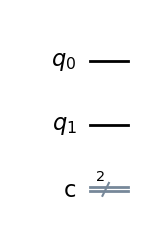

In [ ]:
# 1. CONSTRUÇÃO DO CIRCUITO
# Criamos um circuito com 2 Qubits e 2 Bits Clássicos (para guardar o resultado)
qc = QuantumCircuit(2, 2)

# Visualizar estado inicial
estado_inicial = Statevector.from_instruction(qc)
print("Estado inicial: |00⟩")
print(estado_inicial)

# Desenha o circuito
print("\nCircuito inicial:")
qc.draw('mpl')

# É uma boa prática para quem está aprendendo sempre desenhar o circuito após cada modificação.

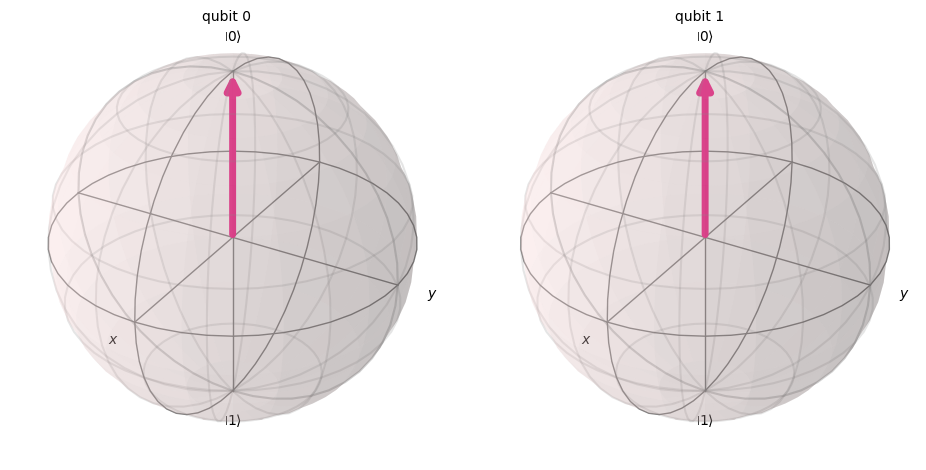

In [3]:
# Esfera de Bloch - Estado inicial
plot_bloch_multivector(estado_inicial)

### Passo 2: Aplicar a Porta Hadamard (H)

A porta Hadamard cria uma **superposição**: transforma |0⟩ em um estado que é simultaneamente 0 e 1.

Matematicamente: 
$$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle$$

Isso significa 50% de probabilidade de medir 0 e 50% de medir 1.

Estado após H: 1/√2(|00⟩ + |10⟩)
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


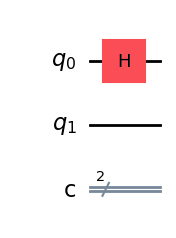

In [4]:
# Aplicamos a porta Hadamard (H) no qubit 0
# Matematicamente: Leva |0> para uma superposição (50% 0, 50% 1)
qc.h(0)

# Visualizar estado após Hadamard
estado_apos_h = Statevector.from_instruction(qc)
print("Estado após H: 1/√2(|00⟩ + |10⟩)")
print(estado_apos_h)
qc.draw('mpl')

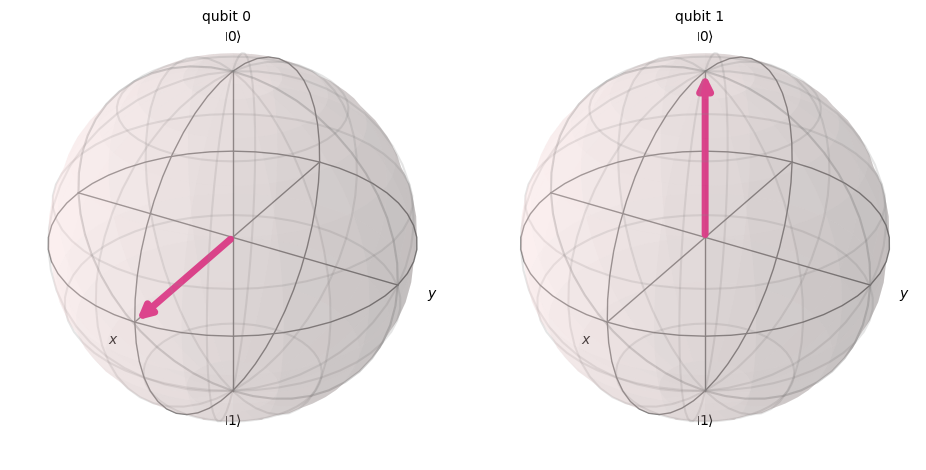

In [ ]:
# Esfera de Bloch - Após Hadamard
plot_bloch_multivector(estado_apos_h)

# Veja que somente aplicamos a porta H no qubit 0, o qubit 1 permanece em |0⟩.

### Passo 3: Criar Emaranhamento com CNOT

A porta CNOT (Controlled-NOT) é uma porta de **dois qubits**:
- **Qubit 0** (controle): Se estiver em |1⟩, inverte o qubit alvo
- **Qubit 1** (alvo): É invertido se o controle for |1⟩

Como o qubit 0 está em superposição, isso cria **emaranhamento** entre os dois qubits!

Matematicamente, criamos o estado de Bell:
$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

Isso significa: ou **ambos são 0**, ou **ambos são 1** - nunca 01 ou 10!

Estado após CNOT: 1/√2(|00⟩ + |11⟩) - Estado de Bell |Φ+⟩
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


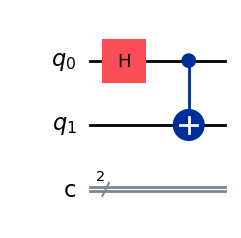

In [6]:
# Aplicamos a porta CNOT (Control-NOT)
# O Qubit 0 é o controle, o Qubit 1 é o alvo.
# Se o Qubit 0 for 1, ele inverte o Qubit 1.
# Como o Qubit 0 está em superposição, eles ficam EMARANHADOS.
qc.cx(0, 1)

# Visualizar estado após CNOT (Estado de Bell)
estado_apos_cnot = Statevector.from_instruction(qc)
print("Estado após CNOT: 1/√2(|00⟩ + |11⟩) - Estado de Bell |Φ+⟩")
print(estado_apos_cnot)
qc.draw('mpl')


🌐 Q-Sphere - Mostra todas as amplitudes do estado emaranhado:


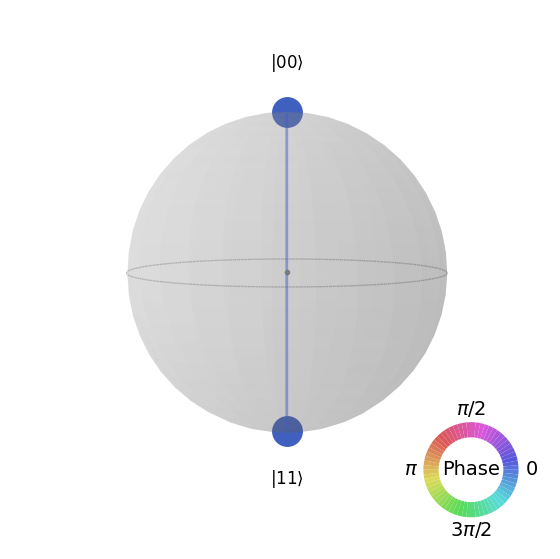

In [7]:
# Q-Sphere - Melhor para visualizar o estado emaranhado completo
print("\n🌐 Q-Sphere - Mostra todas as amplitudes do estado emaranhado:")
plot_state_qsphere(estado_apos_cnot)

### Passo 4: Medir os Qubits

A medição **colapsa** o estado quântico para um resultado clássico:
- Qubit 0 → armazena no bit clássico 0
- Qubit 1 → armazena no bit clássico 1

Após a medição, teremos apenas 0s e 1s (não mais superposição).

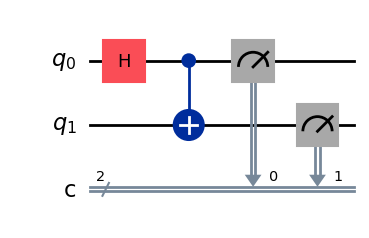

In [8]:
# Medimos os qubits
# Qubit 0 -> guarda no Bit 0
# Qubit 1 -> guarda no Bit 1
qc.measure([0, 1], [0, 1])

# Desenhar circuito completo
qc.draw('mpl')

⚠️ **Nota:** Após adicionar as medições, não podemos mais extrair o Statevector (a medição colapsa o estado). As visualizações acima mostram o estado **antes** da medição.

---

## 2️⃣ Executando o Circuito (Simulação)

Agora vamos **executar** o circuito usando um simulador quântico. Rodaremos 1000 vezes para ver a distribuição de probabilidades.

### Processo:
1. **Transpilação**: Otimiza o circuito para o simulador
2. **Execução**: Roda 1000 vezes (shots)
3. **Análise**: Coleta os resultados estatísticos

In [9]:

# 2. EXECUÇÃO (SIMULAÇÃO)
simulador = AerSimulator()

# Transpilação: otimiza o circuito para o backend específico (neste caso, o simulador)
circuito_compilado = transpile(qc, simulador)

# Rodamos a simulação 1000 vezes (shots)
job = simulador.run(circuito_compilado, shots=1000)

# 3. ANÁLISE DE RESULTADOS
resultado = job.result()
contagens = resultado.get_counts()

print("\n--- Resultados da Medição (1000 execuções) ---")
print(contagens)


--- Resultados da Medição (1000 execuções) ---
{'00': 503, '11': 497}


### 📊 Interpretando os Resultados

Observe os resultados acima - você verá apenas **00** e **11**, aproximadamente 50% cada.

**Por quê?**
- O qubit 0 estava em superposição (era 0 e 1 ao mesmo tempo)
- O qubit 1 começou em 0
- Quando aplicamos CNOT, criamos **emaranhamento**: ou ambos são 0, ou ambos são 1

**Importante:** Não existe probabilidade de obter 01 ou 10! Isso é a "magia" do emaranhamento quântico.

### 🎯 O Estado de Bell

Matematicamente, criamos o famoso **estado de Bell**:

$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

Este é um dos estados mais importantes da computação quântica! 

**Significado:**
- É uma correlação que **não existe na física clássica**
- Base para teletransporte quântico, criptografia quântica e outros protocolos
- Demonstra o poder único dos computadores quânticos

---

## 3️⃣ Visualização Avançada: A Esfera de Bloch

### 🌍 O Conceito: Navegando na Esfera

A **Esfera de Bloch** é uma representação geométrica 3D do estado de um qubit.

Imagine o planeta Terra:

- **Pólo Norte ⬆️**: Estado |0⟩
- **Pólo Sul ⬇️**: Estado |1⟩
- **Equador 🌍**: Estados de **superposição** (50% de chance de 0 ou 1)

O vetor de estado é uma **seta** do centro da esfera até a superfície:
- Apontando para cima → qubit é |0⟩
- Apontando para baixo → qubit é |1⟩
- Apontando para o equador → qubit em superposição

### 📐 Matemática da Esfera

O estado geral de um qubit pode ser escrito como:
$$|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle$$

Onde:
- **θ (theta)**: Ângulo polar - controla probabilidade de 0 vs 1 (latitude)
- **φ (phi)**: Ângulo azimutal - controla a fase quântica (longitude)

**Importante:** A fase φ não afeta a probabilidade de medição, mas é crucial para **interferência quântica** em algoritmos!

### 💡 Exemplos Práticos

Vamos visualizar três estados fundamentais na Esfera de Bloch:

Gerando imagem do Estado Zero (Pólo Norte)...


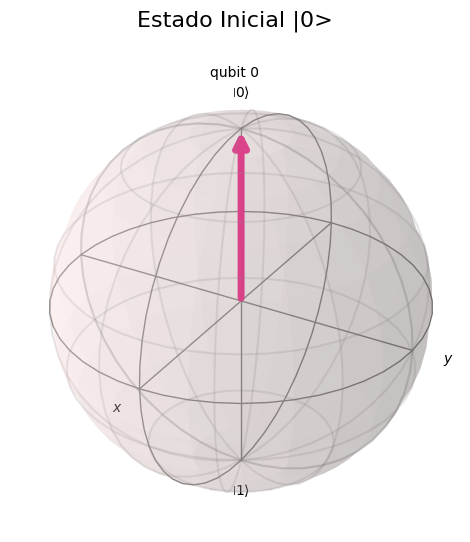

In [10]:
%matplotlib inline

# --- 1. Estado Inicial (|0>) ---
# Um circuito vazio começa sempre em zero
qc_zero = QuantumCircuit(1)

# Extraímos o estado matemático (vetor)
estado_zero = Statevector(qc_zero)

print("Gerando imagem do Estado Zero (Pólo Norte)...")

# Nota: plot_bloch_multivector retorna uma figura matplotlib
fig1 = plot_bloch_multivector(estado_zero, title="Estado Inicial |0>")


#### Exemplo 1: Estado Inicial |0⟩ (Pólo Norte)

Um circuito vazio sempre começa com todos os qubits em |0⟩:

Gerando imagem da Superposição (Equador)...


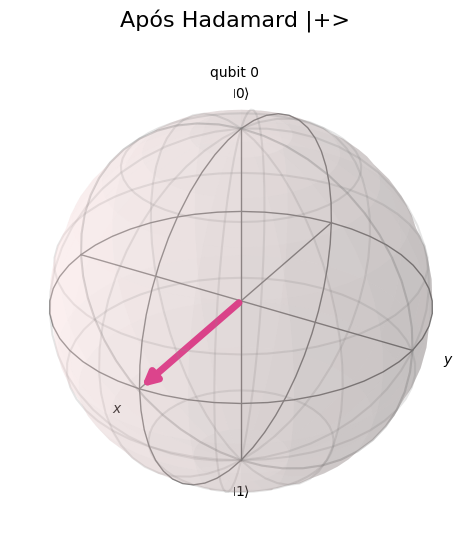

In [11]:
# --- 2. Estado de Superposição (Apicando Hadamard) ---
qc_super = QuantumCircuit(1)
qc_super.h(0) # Aplica H
# qc_super.z(0) # Aplica Z para mostrar diferença de fase
estado_super = Statevector(qc_super)

print("Gerando imagem da Superposição (Equador)...")
fig2 = plot_bloch_multivector(estado_super, title="Após Hadamard |+>")

#### Exemplo 2: Superposição |+⟩ (Equador)

Aplicando a porta Hadamard, movemos o estado do pólo norte para o equador:

Gerando imagem do Estado Invertido (Pólo Sul)...


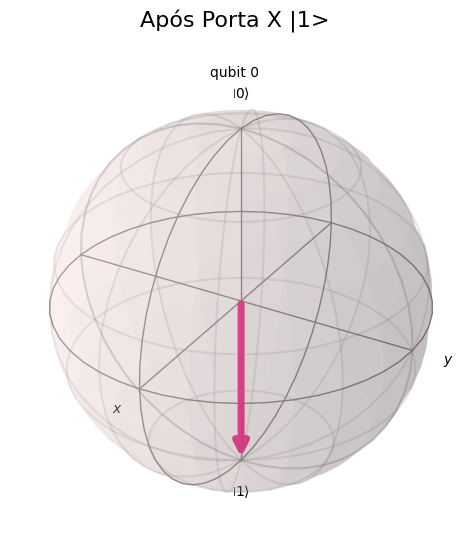

In [12]:

# --- 3. Estado Invertido (Aplicando X) ---
qc_inv = QuantumCircuit(1)
qc_inv.x(0) # Aplica X
estado_inv = Statevector(qc_inv)

print("Gerando imagem do Estado Invertido (Pólo Sul)...")
fig3 = plot_bloch_multivector(estado_inv, title="Após Porta X |1>")


#### Exemplo 3: Estado |1⟩ (Pólo Sul)

Aplicando a porta X (NOT quântico), invertemos completamente o estado:

### 📊 Interpretando as Visualizações

O que você verá nas figuras acima:

1. **Figura 1 (Estado Inicial):** 
   - A seta vermelha aponta para o **Pólo Norte (Eixo Z+)**
   - Isso é o estado |0⟩
   - 100% de probabilidade de medir 0
   
2. **Figura 2 (Após Hadamard):** 
   - A seta desce para o **Equador (Eixo X+)**
   - Estado |+⟩ = superposição com fase positiva
   - 50% de chance de medir 0, 50% de medir 1
   - A direção específica (X+) indica a **fase** da superposição

3. **Figura 3 (Após Porta X):** 
   - A seta aponta para o **Pólo Sul (Eixo Z-)**
   - Isso é o estado |1⟩
   - 100% de probabilidade de medir 1

### 🎯 Entendendo a Fase Quântica

**Experimento:** Tente adicionar uma porta Z logo após a porta H na Exemplo 2:

```python
qc_super.h(0)  # Hadamard
qc_super.z(0)  # Porta Z - rotação de fase
```

A porta Z **gira o qubit ao redor do eixo vertical** (eixo Z).

**O que acontece:**
- **Visualmente:** A seta continua no equador (mesma probabilidade 50/50)
- **Mas:** Agora aponta para **Eixo X-** (fase negativa)
- **Significado:** A probabilidade não muda, mas a **fase** muda!

**Por que isso importa:**
- Em algoritmos quânticos, qubits interferem uns com os outros
- A direção da seta (fase) determina se a interferência será **construtiva** ou **destrutiva**
- Isso é fundamental para algoritmos como Grover e Shor!

---

## 🎓 Resumo do que Aprendemos

Parabéns! Você já dominou os fundamentos:

### ✅ Conceitos Matemáticos
- Vetores de estado representam qubits
- Matrizes representam portas quânticas
- Superposição e emaranhamento como operações lineares

### ✅ Programação no Qiskit
- Criar circuitos quânticos (`QuantumCircuit`)
- Aplicar portas (H, X, CNOT)
- Medir qubits
- Executar simulações

### ✅ Visualização
- Entender a Esfera de Bloch
- Interpretar o vetor de estado geometricamente
- Distinguir probabilidade vs fase quântica

### 🚀 Próximos Passos

Agora você está pronto para explorar:
- Algoritmos quânticos (Deutsch-Jozsa, Grover, Shor)
- Protocolos de comunicação quântica (Teletransporte, Superdense Coding)
- Correção de erros quânticos
- Computação quântica em hardware real (IBM Quantum)